# (Prosper Loan Data Exploration)
## by (Ahmed ElSotohy)

## Investigation Overview

> In this investigation I wanted to investigate what features could affect BorrowerAPR.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data [dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000) explains the variables in the data set

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

columns = ['BorrowerAPR', 'StatedMonthlyIncome', 'EmploymentStatus', 'LoanOriginalAmount', 'Term', 
           'ProsperRating (Alpha)', 'IncomeRange', 'EmploymentStatusDuration']
sub = df[columns]
sub = sub[~sub.BorrowerAPR.isna()]

#Ordering Prosper Rating, income range and employment status as ordered categorical types
prosper_rating = ['AA','A','B','C','D', 'E', 'HR'] # High to low rating
p_rating = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating)
income_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999', '$100,000+', 'Not displayed' ]
income_order = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
emp_status = ['Not employed','Employed', 'Full-time', 'Part-time', 'Self-employed', 'Other', 'Retired',  'Not available']
emp_order  = pd.api.types.CategoricalDtype(ordered = True, categories = emp_status)

sub['ProsperRating (Alpha)'] = sub['ProsperRating (Alpha)'].astype(p_rating)
sub['IncomeRange'] = sub['IncomeRange'].astype(income_order)
sub['EmploymentStatus'] = sub['EmploymentStatus'].astype(emp_order)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of BorrowerAPR)

> BorrowerAPR's distiribution looks multimodal with small, medium, and large peaks. The highest peak is between 0.35, and 0.36 APR.

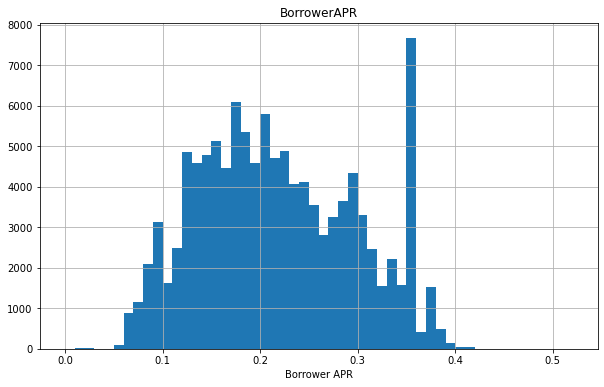

In [3]:
bins = np.arange(0, sub.BorrowerAPR.max()+0.01, 0.01)
sub.hist('BorrowerAPR', bins = bins, figsize= [10, 6]);
plt.xlabel('Borrower APR');
plt.show()

## (Distiribution of Monthly Income)

> I've plotted monthly income on a log scale due to it having a long tail. It looks right skewed, with most borrower's earning less than 30k a month, and only 3% earning more than 30k. However, we have a few borrowers that earns a lot more than 100k a month, and are only taking loans around 5k. We'll consider them as outliers and drop the 3% earning more than 30k a month to better interpret our data.

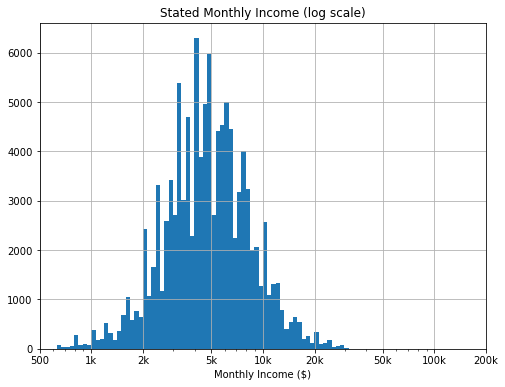

In [9]:
#We'll be plotting the above distribution on a log scale due to it having a long tail
bins = 10 ** np.arange(2.8, np.log10(sub['StatedMonthlyIncome'].max())+0.025, 0.025)
sub.hist('StatedMonthlyIncome', bins = bins, figsize= [8, 6]);
plt.xscale('log')
xticks = [500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5]
plt.xticks(xticks, [500, '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
plt.xlabel('Monthly Income ($)');
plt.title('Stated Monthly Income (log scale)');

sub = sub[sub['StatedMonthlyIncome']<=30000]

## (Loan Amount by BorrowerAPR and ProsperRating)

> We can observe that BorrowerAPR decreases with better ProsperRating, and also those with better ProsperRating borrows more money. The opposite can be clearly observed for for borrowers with low ProsperRating as they tend to have a high BorrowerAPR, and are borrowing less money.

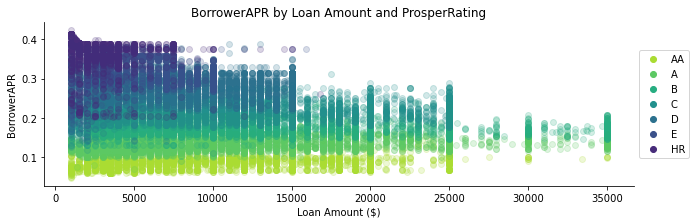

In [5]:
#We'll explore BorrowerAPR, LoanOriginalAmount, and ProsperRating.
g = sns.FacetGrid(data = sub, hue = 'ProsperRating (Alpha)', palette = 'viridis_r', aspect = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha = 1/5);
leg = plt.legend(bbox_to_anchor = [1, 0.5], loc = 6);
for lh in leg.legendHandles:
   lh.set_alpha(1)
plt.title('BorrowerAPR by Loan Amount and ProsperRating');
plt.xlabel('Loan Amount ($)');

## (BorrowerAPR by Rating and Term)

> We can see that Borrower APR decreases with higher Terms, however that's only from ProsperRating HR till C, as from B till AA, the longer the Term, the higher the BorrowerAPR.

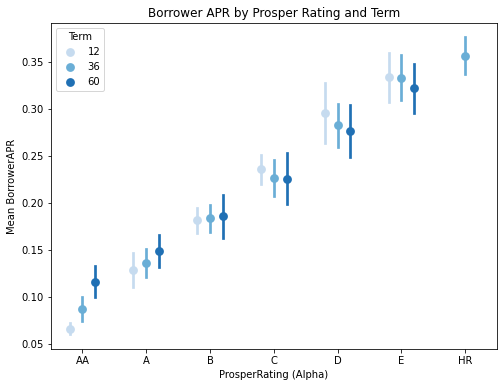

In [6]:
plt.figure(figsize = [8, 6])

sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd')
plt.ylabel('Mean BorrowerAPR')
plt.title('Borrower APR by Prosper Rating and Term');

## (Rating & Monthly Income by Loan Amount & Term)

> We can see that Loan Original Amount increases with the loan's term across all ProsperRatings. Also, there doesn't seem to be a noticeable relationship between ProsperRating, Stated Monthly Income, and Term.

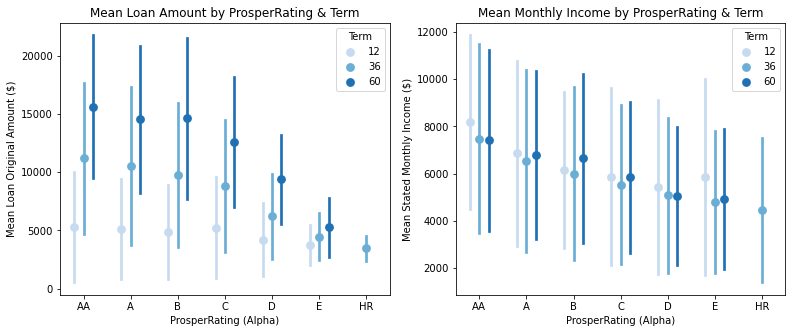

In [16]:
fig, ax = plt.subplots(1, 2, figsize = [13, 5])

a = sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd', ax = ax[0])
a.set_ylabel('Mean Loan Original Amount ($)')
a.set_title('Mean Loan Amount by ProsperRating & Term')
b = sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd', ax = ax[1])
b.set_ylabel('Mean Stated Monthly Income ($)');
b.set_title('Mean Monthly Income by ProsperRating & Term');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [17]:
!jupyter nbconvert presentation.ipynb --to slides  --no-input --no-prompt

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 776302 bytes to presentation.slides.html
